In [1]:
import numpy as np
import pandas as pd

用值列表生成 Series 时，Pandas 默认自动生成整数索引：

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

用含日期时间索引与标签的 NumPy 数组生成 DataFrame：

In [7]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [8]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-1.208257,2.018486,0.679159,-0.587707
2013-01-02,-1.102261,-0.538013,-1.109248,-0.266041
2013-01-03,-0.059864,0.256894,0.216735,1.641164
2013-01-04,0.644392,0.316984,-0.583878,1.197701
2013-01-05,-1.350474,-0.821996,-0.470402,0.757722
2013-01-06,1.402061,1.085841,1.371425,0.586610


用 Series 字典对象生成 DataFrame：

In [9]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


DataFrame 的列有不同数据类型

In [10]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

IPython支持 tab 键自动补全列名与公共属性。下面是部分可自动补全的属性：

- `df2.A`
- `df2.abs`
- `df2.add`
- `df2.add_prefix`
- `df2.add_suffix`
- `df2.align`
- `df2.all`
- `df2.any`
- `df2.append`
- `df2.apply`
- `df2.applymap`
- `df2.D`
- `df2.bool`
- `df2.boxplot`
- `df2.C`
- `df2.clip`
- `df2.clip_lower`
- `df2.clip_upper`
- `df2.columns`
- `df2.combine`
- `df2.combine_first`
- `df2.compound`
- `df2.consolidate`

列 A、B、C、D 和 E 都可以自动补全；为简洁起见，此处只显示了部分属性。

## 查看数据

In [11]:
# 查看 DataFrame 头部数据
df.head()

,A,B,C,D
2013-01-01,-1.208257,2.018486,0.679159,-0.587707
2013-01-02,-1.102261,-0.538013,-1.109248,-0.266041
2013-01-03,-0.059864,0.256894,0.216735,1.641164
2013-01-04,0.644392,0.316984,-0.583878,1.197701
2013-01-05,-1.350474,-0.821996,-0.470402,0.757722


In [12]:
# 查看 DataFrame 尾部数据
df.tail(3)

,A,B,C,D
2013-01-04,0.644392,0.316984,-0.583878,1.197701
2013-01-05,-1.350474,-0.821996,-0.470402,0.757722
2013-01-06,1.402061,1.085841,1.371425,0.586610


In [18]:
# 显示索引
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [17]:
# 显示列名
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

[DataFrame.to_numpy()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy)输出底层数据的 NumPy 对象。注意，[DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame)的列由多种数据类型组成时，该操作耗费系统资源较大，这也是 Pandas 和 NumPy 的本质区别：NumPy 数组只有一种数据类型，DataFrame 每列的数据类型各不相同。调用`DataFrame.to_numpy()`时，Pandas 查找支持 DataFrame 里所有数据类型的 NumPy 数据类型。还有一种数据类型是 object，可以把 DataFrame 列里的值强制转换为 Python 对象。

下面的 df 这个 DataFrame 里的值都是浮点数，DataFrame.to_numpy() 的操作会很快，而且不复制数据。

以上已被弃用，使用`df.values`。

In [29]:
df.values

array([[-1.20825672,  2.01848555,  0.67915936, -0.58770664],
       [-1.10226148, -0.53801317, -1.10924812, -0.26604054],
       [-0.05986367,  0.25689426,  0.21673474,  1.64116426],
       [ 0.6443919 ,  0.31698433, -0.58387757,  1.19770101],
       [-1.35047373, -0.82199591, -0.47040205,  0.75772182],
       [ 1.40206092,  1.08584129,  1.37142466,  0.58661014]])

In [30]:
df2.values

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

`df.describe()`快速查看数据的统计摘要

In [31]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.279067,0.386366,0.017299,0.554908
std,1.132782,1.047785,0.914315,0.850270
min,-1.350474,-0.821996,-1.109248,-0.587707
25%,-1.181758,-0.339286,-0.555509,-0.052878
50%,-0.581063,0.286939,-0.126834,0.672166
75%,0.468328,0.893627,0.563553,1.087706
max,1.402061,2.018486,1.371425,1.641164


In [32]:
# 转制数据
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-1.208257,-1.102261,-0.059864,0.644392,-1.350474,1.402061
B,2.018486,-0.538013,0.256894,0.316984,-0.821996,1.085841
C,0.679159,-1.109248,0.216735,-0.583878,-0.470402,1.371425
D,-0.587707,-0.266041,1.641164,1.197701,0.757722,0.586610


In [33]:
# 按轴排序
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.587707,0.679159,2.018486,-1.208257
2013-01-02,-0.266041,-1.109248,-0.538013,-1.102261
2013-01-03,1.641164,0.216735,0.256894,-0.059864
2013-01-04,1.197701,-0.583878,0.316984,0.644392
2013-01-05,0.757722,-0.470402,-0.821996,-1.350474
2013-01-06,0.586610,1.371425,1.085841,1.402061


In [34]:
# 按值排序
df.sort_values(by='B')

,A,B,C,D
2013-01-05,-1.350474,-0.821996,-0.470402,0.757722
2013-01-02,-1.102261,-0.538013,-1.109248,-0.266041
2013-01-03,-0.059864,0.256894,0.216735,1.641164
2013-01-04,0.644392,0.316984,-0.583878,1.197701
2013-01-06,1.402061,1.085841,1.371425,0.586610
2013-01-01,-1.208257,2.018486,0.679159,-0.587707


## 选择
> **提醒**
选择、设置标准 Python / Numpy 的表达式已经非常直观，交互也很方便，但对于生产代码，我们还是推荐优化过的 Pandas 数据访问方法：`.at`、`.iat`、`.loc` 和 `.iloc`。

详见[索引与选择数据](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing)、[多层索引与高级索引](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#advanced)文档。

## 获取数据
选择单列，产生 Series，与 `df.A` 等效：

In [35]:
df['A']

2013-01-01   -1.208257
2013-01-02   -1.102261
2013-01-03   -0.059864
2013-01-04    0.644392
2013-01-05   -1.350474
2013-01-06    1.402061
Freq: D, Name: A, dtype: float64

用 [ ] 切片行：

In [36]:
df[0:3]

,A,B,C,D
2013-01-01,-1.208257,2.018486,0.679159,-0.587707
2013-01-02,-1.102261,-0.538013,-1.109248,-0.266041
2013-01-03,-0.059864,0.256894,0.216735,1.641164


## [按标签选择](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-label)
用标签提取一行数据：

In [41]:
df.loc[dates[0]]

A   -1.208257
B    2.018486
C    0.679159
D   -0.587707
Name: 2013-01-01 00:00:00, dtype: float64

In [42]:
# 用标签选择多列数据
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,-1.208257,2.018486
2013-01-02,-1.102261,-0.538013
2013-01-03,-0.059864,0.256894
2013-01-04,0.644392,0.316984
2013-01-05,-1.350474,-0.821996
2013-01-06,1.402061,1.085841


In [43]:
# 用标签切片，包含行与列结束点
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,-1.102261,-0.538013
2013-01-03,-0.059864,0.256894
2013-01-04,0.644392,0.316984


In [44]:
# 返回对象降维
df.loc['20130102', ['A', 'B']]

A   -1.102261
B   -0.538013
Name: 2013-01-02 00:00:00, dtype: float64

In [45]:
# 提取标量值
df.loc[dates[0], 'A']

-1.2082567185245703

In [47]:
# 快速访问标量，与 loc 等效
df.at[dates[0], 'A']

-1.2082567185245703

## [按位置选择](http://pandas.pydata.org/Pandas-docs/stable/indexing.html#indexing-integer)

用整数位置选择：

In [48]:
df.iloc[3]

A    0.644392
B    0.316984
C   -0.583878
D    1.197701
Name: 2013-01-04 00:00:00, dtype: float64

In [49]:
# 类似 NumPy / Python，用整数切片：
df.iloc[3:5, 0:2]

,A,B
2013-01-04,0.644392,0.316984
2013-01-05,-1.350474,-0.821996


In [50]:
# 类似 NumPy / Python，用整数列表按位置切片：
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-1.102261,-1.109248
2013-01-03,-0.059864,0.216735
2013-01-05,-1.350474,-0.470402


In [51]:
# 显式整行切片
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-1.102261,-0.538013,-1.109248,-0.266041
2013-01-03,-0.059864,0.256894,0.216735,1.641164


In [52]:
# 显式整列切片
df.iloc[:, 1:3]

,B,C
2013-01-01,2.018486,0.679159
2013-01-02,-0.538013,-1.109248
2013-01-03,0.256894,0.216735
2013-01-04,0.316984,-0.583878
2013-01-05,-0.821996,-0.470402
2013-01-06,1.085841,1.371425


In [53]:
# 显式提取值
df.iloc[1, 1]

-0.5380131662468983

In [54]:
# 快速访问标量 等效与 iloc
df.iat[1, 1]

-0.5380131662468983

## 布尔索引
用单列的值选择数据：

In [55]:
df[df.A > 0]

,A,B,C,D
2013-01-04,0.644392,0.316984,-0.583878,1.197701
2013-01-06,1.402061,1.085841,1.371425,0.586610


In [56]:
# 选择 DataFrame 里满足条件的值
df[df > 0]

,A,B,C,D
2013-01-01,NaN,2.018486,0.679159,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,NaN,0.256894,0.216735,1.641164
2013-01-04,0.644392,0.316984,NaN,1.197701
2013-01-05,NaN,NaN,NaN,0.757722
2013-01-06,1.402061,1.085841,1.371425,0.586610


In [57]:
# 用 isin() 筛选
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,-1.208257,2.018486,0.679159,-0.587707,one
2013-01-02,-1.102261,-0.538013,-1.109248,-0.266041,one
2013-01-03,-0.059864,0.256894,0.216735,1.641164,two
2013-01-04,0.644392,0.316984,-0.583878,1.197701,three
2013-01-05,-1.350474,-0.821996,-0.470402,0.757722,four
2013-01-06,1.402061,1.085841,1.371425,0.586610,three


In [59]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,-0.059864,0.256894,0.216735,1.641164,two
2013-01-05,-1.350474,-0.821996,-0.470402,0.757722,four


## 赋值
用索引自动对齐新增列的数据：

In [62]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [63]:
df['F'] = s1

In [66]:
# 按标签赋值
df.at[dates[0], 'A'] = 0

# 按位置赋值
df.iat[0, 1] = 0

# 按 NumPy 数组赋值
df.loc[:, 'D'] = np.array([5] * len(df))

df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.679159,5,NaN
2013-01-02,-1.102261,-0.538013,-1.109248,5,1.0
2013-01-03,-0.059864,0.256894,0.216735,5,2.0
2013-01-04,0.644392,0.316984,-0.583878,5,3.0
2013-01-05,-1.350474,-0.821996,-0.470402,5,4.0
2013-01-06,1.402061,1.085841,1.371425,5,5.0


In [67]:
# 用 where 条件赋值
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.679159,-5,NaN
2013-01-02,-1.102261,-0.538013,-1.109248,-5,-1.0
2013-01-03,-0.059864,-0.256894,-0.216735,-5,-2.0
2013-01-04,-0.644392,-0.316984,-0.583878,-5,-3.0
2013-01-05,-1.350474,-0.821996,-0.470402,-5,-4.0
2013-01-06,-1.402061,-1.085841,-1.371425,-5,-5.0


## 缺失值
Pandas 主要用 np.nan 表示缺失数据。 计算时，默认不包含空值。详见[缺失数据](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#missing-data)。

重建索引（reindex）可以更改、添加、删除指定轴的索引，并返回数据副本，即不更改原数据。

In [68]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1], 'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.679159,5,NaN,1.0
2013-01-02,-1.102261,-0.538013,-1.109248,5,1.0,1.0
2013-01-03,-0.059864,0.256894,0.216735,5,2.0,NaN
2013-01-04,0.644392,0.316984,-0.583878,5,3.0,NaN


In [69]:
# 删除所有含缺失值的行
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-1.102261,-0.538013,-1.109248,5,1.0,1.0


In [70]:
# 填充缺失值
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.679159,5,5.0,1.0
2013-01-02,-1.102261,-0.538013,-1.109248,5,1.0,1.0
2013-01-03,-0.059864,0.256894,0.216735,5,2.0,5.0
2013-01-04,0.644392,0.316984,-0.583878,5,3.0,5.0


In [71]:
# 提取 nan 值的布尔掩码
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## 运算
[二进制操作](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html#basics-binop)
### 统计
一般情况下，运算时排除缺失值。
描述性统计：

In [72]:
df.mean()

A   -0.077691
B    0.049952
C    0.017299
D    5.000000
F    3.000000
dtype: float64

In [73]:
# 在另一个轴(即，行)上执行同样的操作
df.mean(1)

2013-01-01    1.419790
2013-01-02    0.650095
2013-01-03    1.482753
2013-01-04    1.675500
2013-01-05    1.271426
2013-01-06    2.771865
Freq: D, dtype: float64

In [74]:
# 不同维度对象运算时，要先对齐。 此外，Pandas 自动沿指定维度广播
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [75]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.059864,-0.743106,-0.783265,4.0,1.0
2013-01-04,-2.355608,-2.683016,-3.583878,2.0,0.0
2013-01-05,-6.350474,-5.821996,-5.470402,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


## Apply 函数
Apply 函数处理数据：

In [76]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.679159,5,NaN
2013-01-02,-1.102261,-0.538013,-0.430089,10,1.0
2013-01-03,-1.162125,-0.281119,-0.213354,15,3.0
2013-01-04,-0.517733,0.035865,-0.797232,20,6.0
2013-01-05,-1.868207,-0.786130,-1.267634,25,10.0
2013-01-06,-0.466146,0.299711,0.103791,30,15.0


In [77]:
df.apply(lambda x: x.max() - x.min())

A    2.752535
B    1.907837
C    2.480673
D    0.000000
F    4.000000
dtype: float64

### [直方图](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html#basics-discretization)

In [78]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    2
1    5
2    1
3    6
4    0
5    0
6    6
7    0
8    6
9    3
dtype: int64

In [79]:
s.value_counts()

6    3
0    3
5    1
3    1
2    1
1    1
dtype: int64

### 字符串方法
Series 的 str 属性包含一组字符串处理功能，如下列代码所示。注意，str 的模式匹配默认使用[正则表达式](https://docs.python.org/3/library/re.html)。详见[矢量字符串方法](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#text-string-methods)。

In [80]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## [合并（Merge）](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#merging)
### 结合（Concat）
Pandas 提供了多种将 Series、DataFrame 对象组合在一起的功能，用索引与关联代数功能的多种设置逻辑可执行连接（join）与合并（merge）操作。
`concat()` 用于连接 Pandas 对象：

In [81]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.502566,-0.511628,0.623375,-1.268366
1,-0.005348,-0.389166,0.845828,-1.311221
2,-0.668189,-0.902713,-0.013661,-0.081365
3,-2.909900,-1.120555,0.355399,1.477955
4,1.375683,-0.188850,-0.214225,0.103172
5,1.963509,-0.822964,-0.045676,-0.609858
6,-0.414279,1.902064,-0.413591,0.847100
7,-0.844159,0.451400,0.152785,-0.090919
8,0.603020,0.165751,-0.944726,-0.175432
9,0.223440,0.908514,-0.028196,-0.827875


In [82]:
# 分解为多组
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,-0.502566,-0.511628,0.623375,-1.268366
1,-0.005348,-0.389166,0.845828,-1.311221
2,-0.668189,-0.902713,-0.013661,-0.081365
3,-2.909900,-1.120555,0.355399,1.477955
4,1.375683,-0.188850,-0.214225,0.103172
5,1.963509,-0.822964,-0.045676,-0.609858
6,-0.414279,1.902064,-0.413591,0.847100
7,-0.844159,0.451400,0.152785,-0.090919
8,0.603020,0.165751,-0.944726,-0.175432
9,0.223440,0.908514,-0.028196,-0.827875


### 连接（join）
SQL 风格的合并。 详见[数据库风格连接](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#merging-join)

In [84]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
left

,key,lval
0,foo,1
1,foo,2


In [85]:
right

,key,rval
0,foo,4
1,foo,5


In [86]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [87]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
left

,key,lval
0,foo,1
1,bar,2


In [88]:
right

,key,rval
0,foo,4
1,bar,5


In [89]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


### [追加（Append）](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#merging-concatenation)
为 DataFrame 追加行。

In [91]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,-0.587099,-1.588919,1.472360,-0.392300
1,0.684682,1.230867,0.306361,0.135656
2,0.260572,-0.052134,0.210093,0.824041
3,0.367933,0.251180,-0.636426,-0.974120
4,1.568328,-0.527065,0.976491,-0.400483
5,0.178050,0.848172,-1.143983,-1.220880
6,-0.746226,-0.666419,-1.200161,0.012734
7,-0.851857,-0.228241,-0.310025,-0.143185


In [92]:
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,-0.587099,-1.588919,1.472360,-0.392300
1,0.684682,1.230867,0.306361,0.135656
2,0.260572,-0.052134,0.210093,0.824041
3,0.367933,0.251180,-0.636426,-0.974120
4,1.568328,-0.527065,0.976491,-0.400483
5,0.178050,0.848172,-1.143983,-1.220880
6,-0.746226,-0.666419,-1.200161,0.012734
7,-0.851857,-0.228241,-0.310025,-0.143185
8,0.367933,0.251180,-0.636426,-0.974120


## [分组（Grouping）](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#groupby)
“group by” 指的是涵盖下列一项或多项步骤的处理流程：

- 分割：按条件把数据分割成多组；
- 应用：为每组单独应用函数；
- 组合：将处理结果组合成一个数据结构。

In [93]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.639678,-0.275382
1,bar,one,-0.093693,1.712390
2,foo,two,1.532994,-0.937525
3,bar,three,-0.442935,-1.317820
4,foo,two,0.179918,0.457977
5,bar,two,-0.355586,-0.449530
6,foo,one,-0.582364,-0.654793
7,foo,three,-0.705421,0.455006


In [94]:
# 先分组，再用 sum()函数计算每组的汇总数据
df.groupby('A').sum()

,C,D
A,,
bar,-0.892214,-0.054960
foo,1.064805,-0.954718


多列分组后，生成多层索引，也可以应用 sum 函数：

In [95]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one   -0.093693  1.712390
    three -0.442935 -1.317820
    two   -0.355586 -0.449530
foo one    0.057314 -0.930176
    three -0.705421  0.455006
    two    1.712912 -0.479548

## 重塑（Reshaping）
详见[多层索引](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#advanced-hierarchical)与[重塑](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#reshaping-stacking)
### 堆叠（Stack）

In [96]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.282081 -1.133788
      two    -0.225216 -1.659150
baz   one     0.281171 -2.048107
      two     0.697422 -1.202862

[`stack()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html#pandas.DataFrame.stack)方法把 DataFrame 列压缩至一层：

In [97]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.282081
               B   -1.133788
       two     A   -0.225216
               B   -1.659150
baz    one     A    0.281171
               B   -2.048107
       two     A    0.697422
               B   -1.202862
dtype: float64

压缩后的 DataFrame 或 Series 具有多层索引， `stack()` 的逆操作是 [`unstack()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html#pandas.DataFrame.unstack)，默认为拆叠最后一层：

In [98]:
stacked.unstack()

A         B
first second                    
bar   one    -0.282081 -1.133788
      two    -0.225216 -1.659150
baz   one     0.281171 -2.048107
      two     0.697422 -1.202862

In [99]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.282081 -0.225216
      B -1.133788 -1.659150
baz   A  0.281171  0.697422
      B -2.048107 -1.202862

In [100]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.282081  0.281171
       B -1.133788 -2.048107
two    A -0.225216  0.697422
       B -1.659150 -1.202862

## [数据透视表（Pivot Tables）](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#reshaping-pivot)

In [101]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['A', 'B', 'C'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,0.352253,-1.099735
1,one,B,foo,-1.450505,2.164000
2,two,C,foo,-0.971546,-0.138073
3,three,A,bar,-0.372918,0.295704
4,one,B,bar,0.604963,0.027776
5,one,C,bar,1.051683,-0.405685
6,two,A,foo,1.816095,-1.669040
7,three,B,foo,-0.540519,-2.826267
8,one,C,foo,1.680825,0.245190
9,one,A,bar,-1.102542,0.236073


用上述数据生成数据透视表非常简单：

In [102]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -1.102542  0.352253
      B  0.604963 -1.450505
      C  1.051683  1.680825
three A -0.372918       NaN
      B       NaN -0.540519
      C -1.954597       NaN
two   A       NaN  1.816095
      B -1.009952       NaN
      C       NaN -0.971546

## [时间序列(TimeSeries)](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries)
Pandas 为频率转换时重采样提供了虽然简单易用，但强大高效的功能，如，将秒级的数据转换为 5 分钟为频率的数据。这种操作常见于财务应用程序，但又不仅限于此。

In [103]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()

2012-01-01    27830
Freq: 5T, dtype: int64

In [104]:
# 时区表示
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06   -0.122874
2012-03-07    3.048883
2012-03-08    0.974570
2012-03-09    0.676963
2012-03-10    1.857628
Freq: D, dtype: float64

In [105]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00   -0.122874
2012-03-07 00:00:00+00:00    3.048883
2012-03-08 00:00:00+00:00    0.974570
2012-03-09 00:00:00+00:00    0.676963
2012-03-10 00:00:00+00:00    1.857628
Freq: D, dtype: float64

In [106]:
# 转换成其它时区
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.122874
2012-03-06 19:00:00-05:00    3.048883
2012-03-07 19:00:00-05:00    0.974570
2012-03-08 19:00:00-05:00    0.676963
2012-03-09 19:00:00-05:00    1.857628
Freq: D, dtype: float64

In [107]:
# 转换时间段
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -1.263639
2012-02-29   -0.101891
2012-03-31   -0.578687
2012-04-30   -1.472608
2012-05-31    0.565977
Freq: M, dtype: float64

In [108]:
ps = ts.to_period()
ps

2012-01   -1.263639
2012-02   -0.101891
2012-03   -0.578687
2012-04   -1.472608
2012-05    0.565977
Freq: M, dtype: float64

In [109]:
ps.to_timestamp()

2012-01-01   -1.263639
2012-02-01   -0.101891
2012-03-01   -0.578687
2012-04-01   -1.472608
2012-05-01    0.565977
Freq: MS, dtype: float64

Pandas 函数可以很方便地转换时间段与时间戳。下例把以 11 月为结束年份的季度频率转换为下一季度月末上午 9 点：

In [110]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00   -1.147739
1990-06-01 09:00    1.924324
1990-09-01 09:00   -0.451538
1990-12-01 09:00    0.978331
1991-03-01 09:00   -0.419933
Freq: H, dtype: float64

## [类别型（Categoricals）](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html#categorical)
Pandas 的 DataFrame 里可以包含类别数据。[API 文档](https://pandas.pydata.org/pandas-docs/stable/reference/arrays.html#api-arrays-categorical)

In [111]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6],
                   "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})
# 将 grade 的原生数据转换为类别型数据
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

用有含义的名字重命名不同类型，调用 `Series.cat.categories`。

In [112]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

重新排序各类别，并添加缺失类，`Series.cat` 的方法默认返回新 Series。

In [113]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium",
                                              "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

注意，这里是按生成类别时的顺序排序，不是按词汇排序：

In [114]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


按类列分组（groupby）时，即便某类别为空，也会显示：

In [115]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## [可视化](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization)

In [117]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

DataFrame 的 `plot()` 方法可以快速绘制所有带标签的列：

<Figure size 432x288 with 0 Axes>

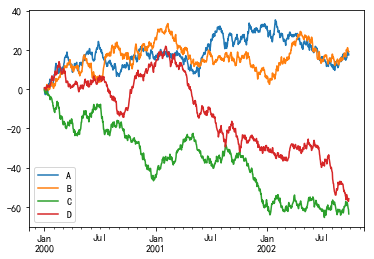

In [119]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
import matplotlib.pyplot as plt
plt.figure()
df.plot()
plt.legend(loc='best')

## 数据输入 / 输出
### [CSV](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-store-in-csv)

In [120]:
# 写入 CSV 文件
df.to_csv('foo.csv')

# 读取 CSV 文件数据
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.195044,0.065385,-0.421133,0.704100
1,2000-01-02,-1.749459,-0.959522,-1.308717,0.350469
2,2000-01-03,-2.023872,-0.712344,-1.249568,0.214411
3,2000-01-04,-2.828729,-0.153114,-1.709583,0.614391
4,2000-01-05,-2.003557,-1.537625,-2.164829,-0.000553
5,2000-01-06,-2.627794,-0.857354,-1.999183,-0.157807
6,2000-01-07,-1.936589,0.379761,-0.986948,-0.555604
7,2000-01-08,-1.556488,1.385253,-0.170394,1.508346
8,2000-01-09,-1.124958,2.321760,-0.496417,1.123920
9,2000-01-10,-0.999756,2.038879,-2.202281,0.938422


## [HDF5](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-hdf5)
写入 HDF5 Store：

In [121]:
df.to_hdf('foo.h5', 'df')

读取 HDF5 Store：

In [122]:
pd.read_hdf('foo.h5', 'df')

,A,B,C,D
2000-01-01,0.195044,0.065385,-0.421133,0.704100
2000-01-02,-1.749459,-0.959522,-1.308717,0.350469
2000-01-03,-2.023872,-0.712344,-1.249568,0.214411
2000-01-04,-2.828729,-0.153114,-1.709583,0.614391
2000-01-05,-2.003557,-1.537625,-2.164829,-0.000553
2000-01-06,-2.627794,-0.857354,-1.999183,-0.157807
2000-01-07,-1.936589,0.379761,-0.986948,-0.555604
2000-01-08,-1.556488,1.385253,-0.170394,1.508346
2000-01-09,-1.124958,2.321760,-0.496417,1.123920
2000-01-10,-0.999756,2.038879,-2.202281,0.938422


## [Excel](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-excel)
写入 Excel 文件：

In [123]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

读取 Excel 文件：

In [124]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,A,B,C,D
2000-01-01,0.195044,0.065385,-0.421133,0.704100
2000-01-02,-1.749459,-0.959522,-1.308717,0.350469
2000-01-03,-2.023872,-0.712344,-1.249568,0.214411
2000-01-04,-2.828729,-0.153114,-1.709583,0.614391
2000-01-05,-2.003557,-1.537625,-2.164829,-0.000553
2000-01-06,-2.627794,-0.857354,-1.999183,-0.157807
2000-01-07,-1.936589,0.379761,-0.986948,-0.555604
2000-01-08,-1.556488,1.385253,-0.170394,1.508346
2000-01-09,-1.124958,2.321760,-0.496417,1.123920
2000-01-10,-0.999756,2.038879,-2.202281,0.938422


## 各种坑（Gotchas）
执行某些操作，将触发异常，如：

In [ ]:
>>> if pd.Series([False, True, False]):
...    print("I was true")

Traceback
    ...
ValueError: The truth value of an array is ambiguous. Use a.empty, a.any() or a.all().

参阅[比较操作](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html#basics-compare)文档，查看错误提示与解决方案。详见[各种坑](https://pandas.pydata.org/Pandas-docs/stable/gotchas.html#gotchas)文档。[Pandas](https://www.pypandas.cn/docs/getting_started/)